# Market Segmentation in Retail Sector

## Import the relevant libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv ('MarketData.csv')

In [3]:
data

,Satisfaction,Loyalty,Age,Gender
0,4,-1.33,67,0
1,6,-0.28,22,1
2,5,-0.99,49,0
3,7,-0.29,45,0
4,4,1.06,53,0
5,1,-1.66,28,0
6,10,-0.97,53,1
7,8,-0.32,35,0
8,8,1.02,61,0
9,8,0.68,28,0


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

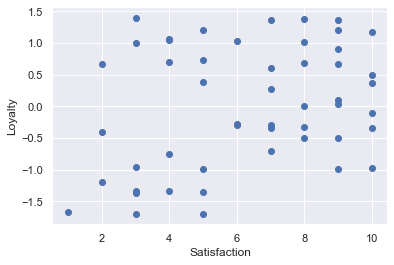

In [4]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Plot the Age 

(array([9., 6., 4., 5., 7., 3., 5., 1., 4., 6.]),
 array([22. , 26.7, 31.4, 36.1, 40.8, 45.5, 50.2, 54.9, 59.6, 64.3, 69. ]),
 <a list of 10 Patch objects>)

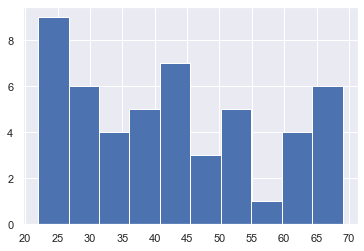

In [5]:
plt.xticks([i for i in range(0,101,5)])
plt.hist(data['Age'])

## Plot the Gender

[30, 20]


([<matplotlib.patches.Wedge at 0x1ff0152b208>,
 [Text(-0.33991877217145816, 1.046162142464278, 'Male'),
  Text(0.3399188701202255, -1.0461621106387813, 'Female')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.0%')])

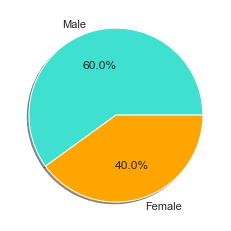

In [6]:
li=[0,0]
for i in data['Gender']:
    li[i]+=1
print(li)
labels = ['Male','Female']
colors=['Turquoise','Orange']
plt.pie(li,labels = labels,colors=colors, autopct="%1.1f%%",shadow=True)

## Select the features

In [7]:
x = data.iloc[:,0:2]

## Clustering

In [8]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [9]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

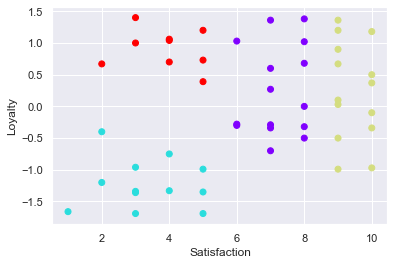

In [10]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

Let's standardize and check the new result

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.87369775, -1.41876236],
       [-0.11396058, -0.30687963],
       [-0.49382916, -1.05872414],
       [ 0.26590801, -0.31746899],
       [-0.87369775,  1.11209451],
       [-2.01330352, -1.76821122],
       [ 1.40551378, -1.03754543],
       [ 0.6457766 , -0.34923707],
       [ 0.6457766 ,  1.06973708],
       [ 0.6457766 ,  0.70969886],
       [ 1.40551378, -0.37041579],
       [-0.49382916,  0.40260744],
       [-0.49382916, -1.7999793 ],
       [-1.63343493,  0.6991095 ],
       [ 0.26590801,  0.27553513],
       [ 1.02564519,  1.42977529],
       [ 0.6457766 ,  1.45095401],
       [ 0.26590801,  1.42977529],
       [ 0.26590801, -0.37041579],
       [ 1.02564519,  0.6991095 ],
       [ 1.40551378,  1.23916683],
       [-1.25356634, -1.7999793 ],
       [-0.87369775,  1.0909158 ],
       [-1.25356634, -1.02695607],
       [-0.11396058,  1.08032644],
       [ 1.02564519, -1.05872414],
       [ 1.40551378,  0.38142872],
       [ 1.02564519,  0.02139051],
       [-1.25356634,

## Take advantage of the Elbow method

In [12]:
wcss =[]
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[100.0,
 52.690624880400094,
 28.961765530489785,
 16.93190409121578,
 13.760438361094764,
 11.818141135242973,
 10.27055982826354,
 8.713533830076827,
 7.852865918008302]

Text(0, 0.5, 'WCSS')

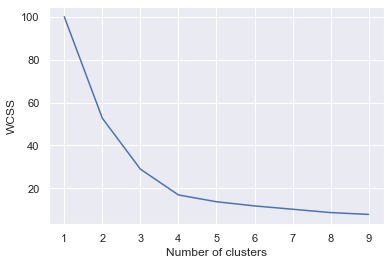

In [13]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [17]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [15]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

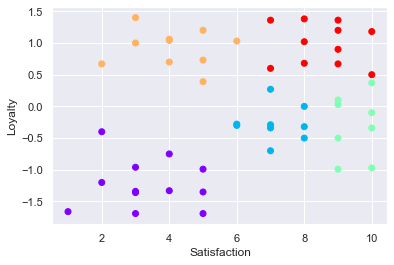

In [18]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')